In [1]:
import pandas as pd
df=pd.read_csv('data\\all_question.csv')

# exact

In [2]:
import json

# 初始化一个空列表来存储分类标签
classification_tags = []

for i in range(1,5):
    previous_id=0
    # 打开文件并逐行读取
    with open('results/q{}_output.jsonl'.format(i), 'r', encoding='utf-8') as file:
        for line in file:
            # 解析每一行的JSON数据
            data = json.loads(line)
            
            # 检查是否存在response和body键
            if 'response' in data and 'body' in data['response']:
                body = data['response']['body']
                current_id=body['request_id'].split('-')[1]
                if int(current_id)-previous_id!=1:
                    print('check')
                    classification_tags.append('其他')
                    previous_id+=2
                # 检查是否存在choices列表
                if 'choices' in body and body['choices']:
                    for choice in body['choices']:
                        if 'message' in choice and 'content' in choice['message']:
                            # 直接获取content，不需要再次解析为JSON
                            content = choice['message']['content']
                            classification_tags.append(content)
                            if int(current_id)-previous_id==1:
                                previous_id+=1

check


In [3]:
len(df),len(classification_tags)

(82679, 82679)

In [3]:
df['label']=classification_tags

In [5]:
df['label'].value_counts()

其他治疗相关问题                                                                                                                                                                                                                                                                      29484
解读检查结果                                                                                                                                                                                                                                                                        28649
治疗相关问题提问                                                                                                                                                                                                                                                                       8681
对治疗相关问题提问                                                                                                                                                                   

# process

## useless label

In [4]:
df['label'].replace({'治疗相关问题提问':'对治疗相关问题提问'},inplace=True)
df['label'].replace({'治疗方案的选择':'对治疗相关问题提问'},inplace=True)
df['label'].replace({'：其他治疗相关问题':'其他治疗相关问题'},inplace=True)
df['label'].replace({'：解读检查结果':'解读检查结果'},inplace=True)
df['label'].replace({'药物购买渠道':'其他治疗相关问题'},inplace=True)
num=len(df)
for i in range(num):
    if df['label'][i] not in ['对治疗相关问题提问','解读检查结果','其他治疗相关问题','患者情绪支持','经济负担','其他']:
        df.drop(index=i,inplace=True)
new_index=range(len(df))
df.reindex(new_index)
df=df.reset_index()

In [6]:
# num=len(df)
# for i in range(num):
#     if df['label'][i] not in ['对治疗相关问题提问','解读检查结果','患者情绪支持','经济负担','其他']:
#         df.drop(index=i,inplace=True)
# new_index=range(len(df))
# df.reindex(new_index)
# df=df.reset_index()

In [5]:
df=df.drop(['index','Thread Title','Thread URL', 'Unnamed: 3',
       'Thread Content',],axis=1)

In [6]:
df['Time']=df['Time'].apply(lambda x: x.split('-')[0])

In [8]:
df

Time IP Address Author Name     label
0      2011        湖南省          尘埃    患者情绪支持
1      2011        四川省          寻找    解读检查结果
2      2011        天津市   mqlyxx521  其他治疗相关问题
3      2011        四川省         一片云    解读检查结果
4      2011        四川省         一片云    解读检查结果
...     ...        ...         ...       ...
82122  2018       黑龙江省     zonghua  其他治疗相关问题
82123  2018        广东省          芊安    解读检查结果
82124  2018        河北省        家人康健  其他治疗相关问题
82125  2018        江苏省         ya0    解读检查结果
82126  2018        山西省    hhhuawei    解读检查结果

[82127 rows x 4 columns]

## delete HMT

In [9]:
copy_df=df.copy()

In [7]:
df=df[df['IP Address']!='台湾省']
df=df[df['IP Address']!='香港特别行政区']
df=df[df['IP Address']!='澳门特别行政区']

## translate

In [8]:
rmap={
    '上海市': 'Shanghai',
    '四川省': 'Sichuan Province',
    '安徽省': 'Anhui Province',
    '广东省': 'Guangdong Province',
    '湖北省': 'Hubei Province',
    '山东省': 'Shandong Province',
    '浙江省': 'Zhejiang Province',
    '云南省': 'Yunnan Province',
    '北京市': 'Beijing',
    '吉林省': 'Jilin Province',
    '天津市': 'Tianjin',
    '宁夏回族自治区': 'Ningxia',
    '山西省': 'Shanxi Province',
    '新疆维吾尔自治区': 'Xinjiang',
    '江苏省': 'Jiangsu Province',
    '江西省': 'Jiangxi Province',
    '河北省': 'Hebei Province',
    '河南省': 'Henan Province',
    '湖南省': 'Hunan Province',
    '甘肃省': 'Gansu Province',
    '福建省': 'Fujian Province',
    '重庆市': 'Chongqing',
    '黑龙江省': 'Heilongjiang Province',
    '内蒙古自治区': 'Neimenggu',
    '广西壮族自治区': 'Guangxi',
    '西藏自治区': 'Tibet',
    '辽宁省': 'Liaoning Province',
    '陕西省': 'Shaanxi Province',
    '海南省': 'Hainan Province',
    '贵州省': 'Guizhou Province',
    '香港特别行政区': 'Hong Kong',
    '青海省':'Qinghai Province',
    '澳门特别行政区':'MaCao',
    '台湾省':'Taiwan Province'
}

In [9]:
df['IP Address']=df['IP Address'].apply(lambda x: rmap[x])

In [10]:
df=df.drop(['Author Name'],axis=1)

In [14]:
df

Time             IP Address     label
0      2011         Hunan Province    患者情绪支持
1      2011       Sichuan Province    解读检查结果
2      2011                Tianjin  其他治疗相关问题
3      2011       Sichuan Province    解读检查结果
4      2011       Sichuan Province    解读检查结果
...     ...                    ...       ...
82122  2018  Heilongjiang Province  其他治疗相关问题
82123  2018     Guangdong Province    解读检查结果
82124  2018         Hebei Province  其他治疗相关问题
82125  2018       Jiangsu Province    解读检查结果
82126  2018        Shanxi Province    解读检查结果

[81964 rows x 3 columns]

# format

In [11]:
result = df.groupby(['Time','IP Address', 'label']).size().reset_index(name='count')
result

Time         IP Address      label  count
0     2011     Anhui Province         其他      1
1     2011     Anhui Province   其他治疗相关问题      4
2     2011     Anhui Province     解读检查结果      2
3     2011            Beijing   其他治疗相关问题      6
4     2011            Beijing  对治疗相关问题提问      9
...    ...                ...        ...    ...
2075  2024  Zhejiang Province   其他治疗相关问题     27
2076  2024  Zhejiang Province  对治疗相关问题提问      7
2077  2024  Zhejiang Province     患者情绪支持      2
2078  2024  Zhejiang Province       经济负担      1
2079  2024  Zhejiang Province     解读检查结果     15

[2080 rows x 4 columns]

In [12]:
byyear=result.groupby(['Time','IP Address','label']).sum()
byyear

count
Time IP Address        label           
2011 Anhui Province    其他             1
                       其他治疗相关问题       4
                       解读检查结果         2
     Beijing           其他治疗相关问题       6
                       对治疗相关问题提问      9
...                                 ...
2024 Zhejiang Province 其他治疗相关问题      27
                       对治疗相关问题提问      7
                       患者情绪支持         2
                       经济负担           1
                       解读检查结果        15

[2080 rows x 1 columns]

In [13]:
total=result.groupby(['IP Address','label']).sum()
total=total.reset_index()
total=total.pivot(index='IP Address',columns='label',values='count')
total=total.fillna(0)
total

C:\Users\86181\AppData\Local\Temp\ipykernel_20104\2987976068.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=result.groupby(['IP Address','label']).sum()


label                     其他  其他治疗相关问题  对治疗相关问题提问  患者情绪支持   经济负担  解读检查结果
IP Address                                                              
Anhui Province          49.0     743.0      414.0    64.0   37.0   669.0
Beijing                173.0    3412.0     1712.0   296.0  156.0  2926.0
Chongqing               24.0     518.0      390.0    55.0   14.0   614.0
Fujian Province         38.0     848.0      590.0    87.0   48.0   886.0
Gansu Province           5.0     139.0       88.0    17.0    3.0   147.0
Guangdong Province     132.0    2510.0     1532.0   282.0  167.0  2577.0
Guangxi                 15.0     323.0      234.0    50.0   29.0   361.0
Guizhou Province        10.0     144.0       95.0    14.0   11.0   132.0
Hainan Province         10.0      95.0       56.0    10.0    2.0   112.0
Hebei Province          95.0    1483.0      835.0   148.0   91.0  1289.0
Heilongjiang Province   40.0     607.0      345.0    56.0   24.0   456.0
Henan Province          61.0    1145.0      695.0   123.0   57.0  1059.0
Hubei Province          61.0    1043.0      683.0   107.0   56.0  1115.0
Hunan Province          44.0     792.0      515.0   103.0   34.0   889.0
Jiangsu Province       123.0    2658.0     1570.0   262.0  172.0  2792.0
Jiangxi Province        29.0     497.0      302.0    63.0   29.0   488.0
Jilin Province          30.0     508.0      278.0    48.0   31.0   499.0
Liaoning Province       79.0    1181.0      709.0   114.0   47.0  1140.0
Neimenggu               21.0     348.0      166.0    27.0   12.0   242.0
Ningxia                  5.0      67.0       38.0    10.0    4.0    66.0
Qinghai Province         3.0      22.0       11.0     1.0    2.0    23.0
Shaanxi Province        32.0     638.0      385.0    62.0   21.0   573.0
Shandong Province      152.0    2511.0     1460.0   248.0  135.0  2336.0
Shanghai                99.0    2098.0     1135.0   223.0  119.0  2095.0
Shanxi Province         47.0     622.0      331.0    54.0   33.0   456.0
Sichuan Province        46.0    1017.0      590.0   125.0   45.0  1089.0
Tianjin                 52.0     979.0      551.0    88.0   53.0   881.0
Tibet                    0.0       2.0        2.0     0.0    0.0    13.0
Xinjiang                16.0     222.0      120.0    29.0   10.0   193.0
Yunnan Province         15.0     240.0      172.0    28.0   25.0   245.0
Zhejiang Province      105.0    2293.0     1282.0   219.0  137.0  2382.0

# plot

## total

In [14]:
# total=total.reindex(columns=['其他治疗相关问题','解读检查结果','对治疗相关问题提问','患者情绪支持','经济负担','其他'])
total=total.reindex(columns=['解读检查结果','其他治疗相关问题','对治疗相关问题提问','患者情绪支持','其他','经济负担'])
total.columns=['Seeking assistance in interpreting medical reports','Other medical related questions','Treatment plan related questions','Other unclassified topics','Express feelings','Treatment cost related questions']
total

Seeking assistance in interpreting medical reports  \
IP Address                                                                  
Anhui Province                                                     669.0    
Beijing                                                           2926.0    
Chongqing                                                          614.0    
Fujian Province                                                    886.0    
Gansu Province                                                     147.0    
Guangdong Province                                                2577.0    
Guangxi                                                            361.0    
Guizhou Province                                                   132.0    
Hainan Province                                                    112.0    
Hebei Province                                                    1289.0    
Heilongjiang Province                                              456.0    
Henan Province                                                    1059.0    
Hubei Province                                                    1115.0    
Hunan Province                                                     889.0    
Jiangsu Province                                                  2792.0    
Jiangxi Province                                                   488.0    
Jilin Province                                                     499.0    
Liaoning Province                                                 1140.0    
Neimenggu                                                          242.0    
Ningxia                                                             66.0    
Qinghai Province                                                    23.0    
Shaanxi Province                                                   573.0    
Shandong Province                                                 2336.0    
Shanghai                                                          2095.0    
Shanxi Province                                                    456.0    
Sichuan Province                                                  1089.0    
Tianjin                                                            881.0    
Tibet                                                               13.0    
Xinjiang                                                           193.0    
Yunnan Province                                                    245.0    
Zhejiang Province                                                 2382.0    

                       Other medical related questions  \
IP Address                                               
Anhui Province                                   743.0   
Beijing                                         3412.0   
Chongqing                                        518.0   
Fujian Province                                  848.0   
Gansu Province                                   139.0   
Guangdong Province                              2510.0   
Guangxi                                          323.0   
Guizhou Province                                 144.0   
Hainan Province                                   95.0   
Hebei Province                                  1483.0   
Heilongjiang Province                            607.0   
Henan Province                                  1145.0   
Hubei Province                                  1043.0   
Hunan Province                                   792.0   
Jiangsu Province                                2658.0   
Jiangxi Province                                 497.0   
Jilin Province                                   508.0   
Liaoning Province                               1181.0   
Neimenggu                                        348.0   
Ningxia                                           67.0   
Qinghai Province                                  22.0   
Shaanxi Province                                 638.0   
Shandong Province                               2511.0   
Shanghai                       

In [19]:
total

Seeking assistance in interpreting medical reports  \
IP Address                                                                  
Anhui Province                                                     669.0    
Beijing                                                           2926.0    
Chongqing                                                          614.0    
Fujian Province                                                    886.0    
Gansu Province                                                     147.0    
Guangdong Province                                                2577.0    
Guangxi                                                            361.0    
Guizhou Province                                                   132.0    
Hainan Province                                                    112.0    
Hebei Province                                                    1289.0    
Heilongjiang Province                                              456.0    
Henan Province                                                    1059.0    
Hubei Province                                                    1115.0    
Hunan Province                                                     889.0    
Jiangsu Province                                                  2792.0    
Jiangxi Province                                                   488.0    
Jilin Province                                                     499.0    
Liaoning Province                                                 1140.0    
Neimenggu                                                          242.0    
Ningxia                                                             66.0    
Qinghai Province                                                    23.0    
Shaanxi Province                                                   573.0    
Shandong Province                                                 2336.0    
Shanghai                                                          2095.0    
Shanxi Province                                                    456.0    
Sichuan Province                                                  1089.0    
Tianjin                                                            881.0    
Tibet                                                               13.0    
Xinjiang                                                           193.0    
Yunnan Province                                                    245.0    
Zhejiang Province                                                 2382.0    

                       Other medical related questions  \
IP Address                                               
Anhui Province                                   743.0   
Beijing                                         3412.0   
Chongqing                                        518.0   
Fujian Province                                  848.0   
Gansu Province                                   139.0   
Guangdong Province                              2510.0   
Guangxi                                          323.0   
Guizhou Province                                 144.0   
Hainan Province                                   95.0   
Hebei Province                                  1483.0   
Heilongjiang Province                            607.0   
Henan Province                                  1145.0   
Hubei Province                                  1043.0   
Hunan Province                                   792.0   
Jiangsu Province                                2658.0   
Jiangxi Province                                 497.0   
Jilin Province                                   508.0   
Liaoning Province                               1181.0   
Neimenggu                                        348.0   
Ningxia                                           67.0   
Qinghai Province                                  22.0   
Shaanxi Province                                 638.0   
Shandong Province                               2511.0   
Shanghai                       

In [20]:
total_rank=total.rank(method='min',ascending=False,axis=1).astype(int)
total_rank

Seeking assistance in interpreting medical reports  \
IP Address                                                                  
Anhui Province                                                         2    
Beijing                                                                2    
Chongqing                                                              1    
Fujian Province                                                        1    
Gansu Province                                                         1    
Guangdong Province                                                     1    
Guangxi                                                                1    
Guizhou Province                                                       2    
Hainan Province                                                        1    
Hebei Province                                                         2    
Heilongjiang Province                                                  2    
Henan Province                                                         2    
Hubei Province                                                         1    
Hunan Province                                                         1    
Jiangsu Province                                                       1    
Jiangxi Province                                                       2    
Jilin Province                                                         2    
Liaoning Province                                                      2    
Neimenggu                                                              2    
Ningxia                                                                2    
Qinghai Province                                                       1    
Shaanxi Province                                                       2    
Shandong Province                                                      2    
Shanghai                                                               2    
Shanxi Province                                                        2    
Sichuan Province                                                       1    
Tianjin                                                                2    
Tibet                                                                  1    
Xinjiang                                                               2    
Yunnan Province                                                        1    
Zhejiang Province                                                      1    

                       Other medical related questions  \
IP Address                                               
Anhui Province                                       1   
Beijing                                              1   
Chongqing                                            2   
Fujian Province                                      2   
Gansu Province                                       2   
Guangdong Province                                   2   
Guangxi                                              2   
Guizhou Province                                     1   
Hainan Province                                      2   
Hebei Province                                       1   
Heilongjiang Province                                1   
Henan Province                                       1   
Hubei Province                                       2   
Hunan Province                                       2   
Jiangsu Province                                     2   
Jiangxi Province                                     1   
Jilin Province                                       1   
Liaoning Province                                    1   
Neimenggu                                            1   
Ningxia                                              1   
Qinghai Province                                     2   
Shaanxi Province                                     1   
Shandong Province                                    1   
Shanghai                       

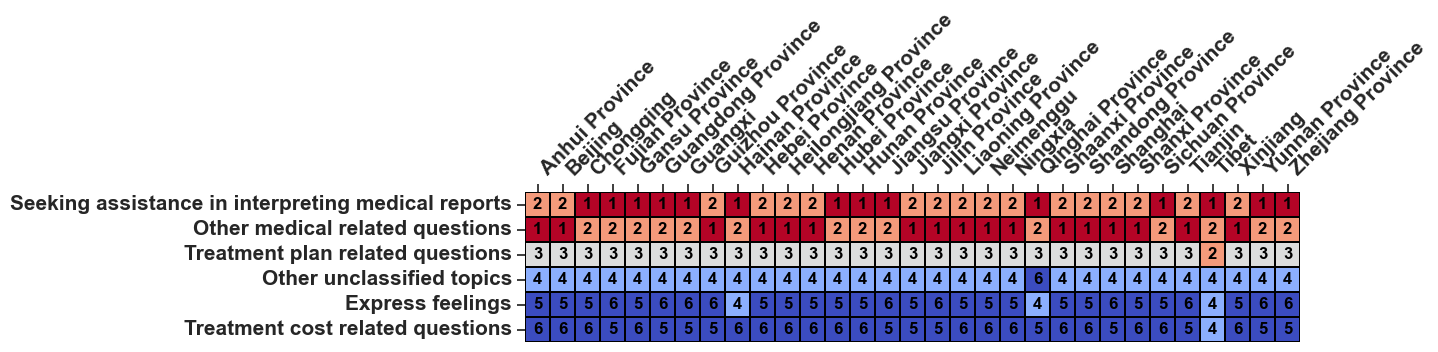

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(context='notebook', style='ticks')
plt.figure(figsize=(10, 5))
ax=sns.heatmap(total_rank.T,square=True,annot=True,cmap='coolwarm_r',cbar=False,vmin=1,vmax=5,center=3,linewidths=0.1,linecolor='black',annot_kws={"color": "black", "weight": "bold"})

ax.xaxis.set_label_position('top')  # 设置x轴标签位置为顶部
ax.xaxis.tick_top()  # 将x轴的刻度移动到顶部
ax.set_xticklabels(ax.get_xticklabels(), weight='bold',rotation=45, ha='left',fontdict={'fontsize':15})
ax.set_yticklabels(ax.get_yticklabels(), weight='bold',fontdict={'fontsize':15})
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.show()

## manual

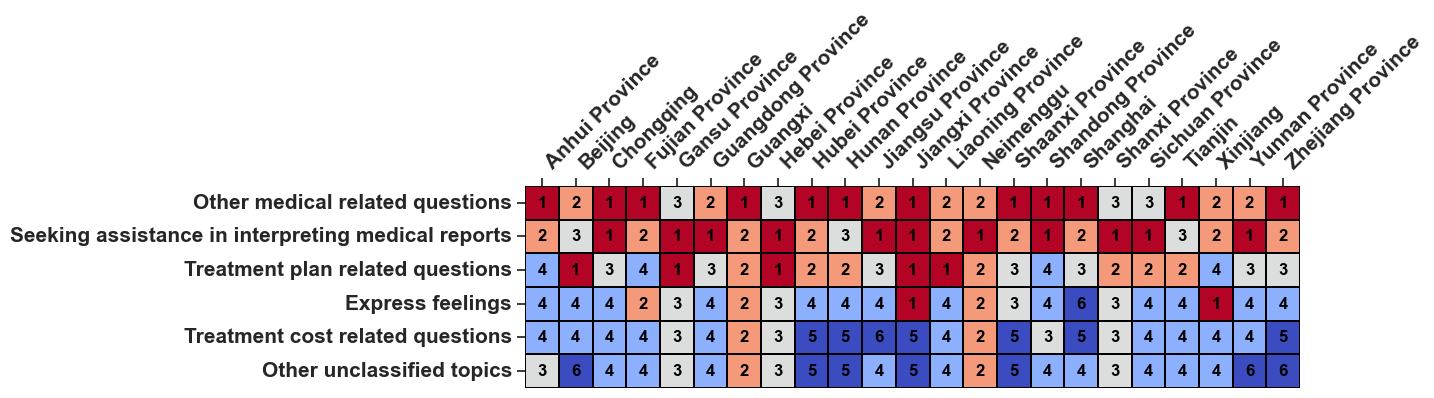

In [28]:
def _plot(year:int):
    year=str(year)
    this_year=byyear.loc[year]
    this_year=this_year.reset_index()
    this_year=this_year.pivot(index='IP Address',columns='label',values='count')
    this_year=this_year.fillna(0)
    this_year=this_year.reindex(columns=['解读检查结果','其他治疗相关问题','对治疗相关问题提问','患者情绪支持','其他','经济负担'])
    this_year.columns=['Seeking assistance in interpreting medical reports','Other medical related questions','Treatment plan related questions','Other unclassified topics','Express feelings','Treatment cost related questions']
    this_year_rank=this_year.rank(method='min',ascending=False,axis=1).astype(int)

    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    sns.set(context='notebook', style='ticks')
    plt.figure(figsize=(10, 5))
    ax=sns.heatmap(this_year_rank.T,square=True,annot=True,cmap='coolwarm_r',cbar=False,vmin=1,vmax=5,center=3,linewidths=0.1,linecolor='black',annot_kws={"color": "black", "weight": "bold"})

    ax.xaxis.set_label_position('top')  # 设置x轴标签位置为顶部
    ax.xaxis.tick_top()  # 将x轴的刻度移动到顶部
    ax.set_xticklabels(ax.get_xticklabels(), weight='bold',rotation=45, ha='left',fontdict={'fontsize':15})
    ax.set_yticklabels(ax.get_yticklabels(), weight='bold',fontdict={'fontsize':15})
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    plt.show()
_plot(2011)

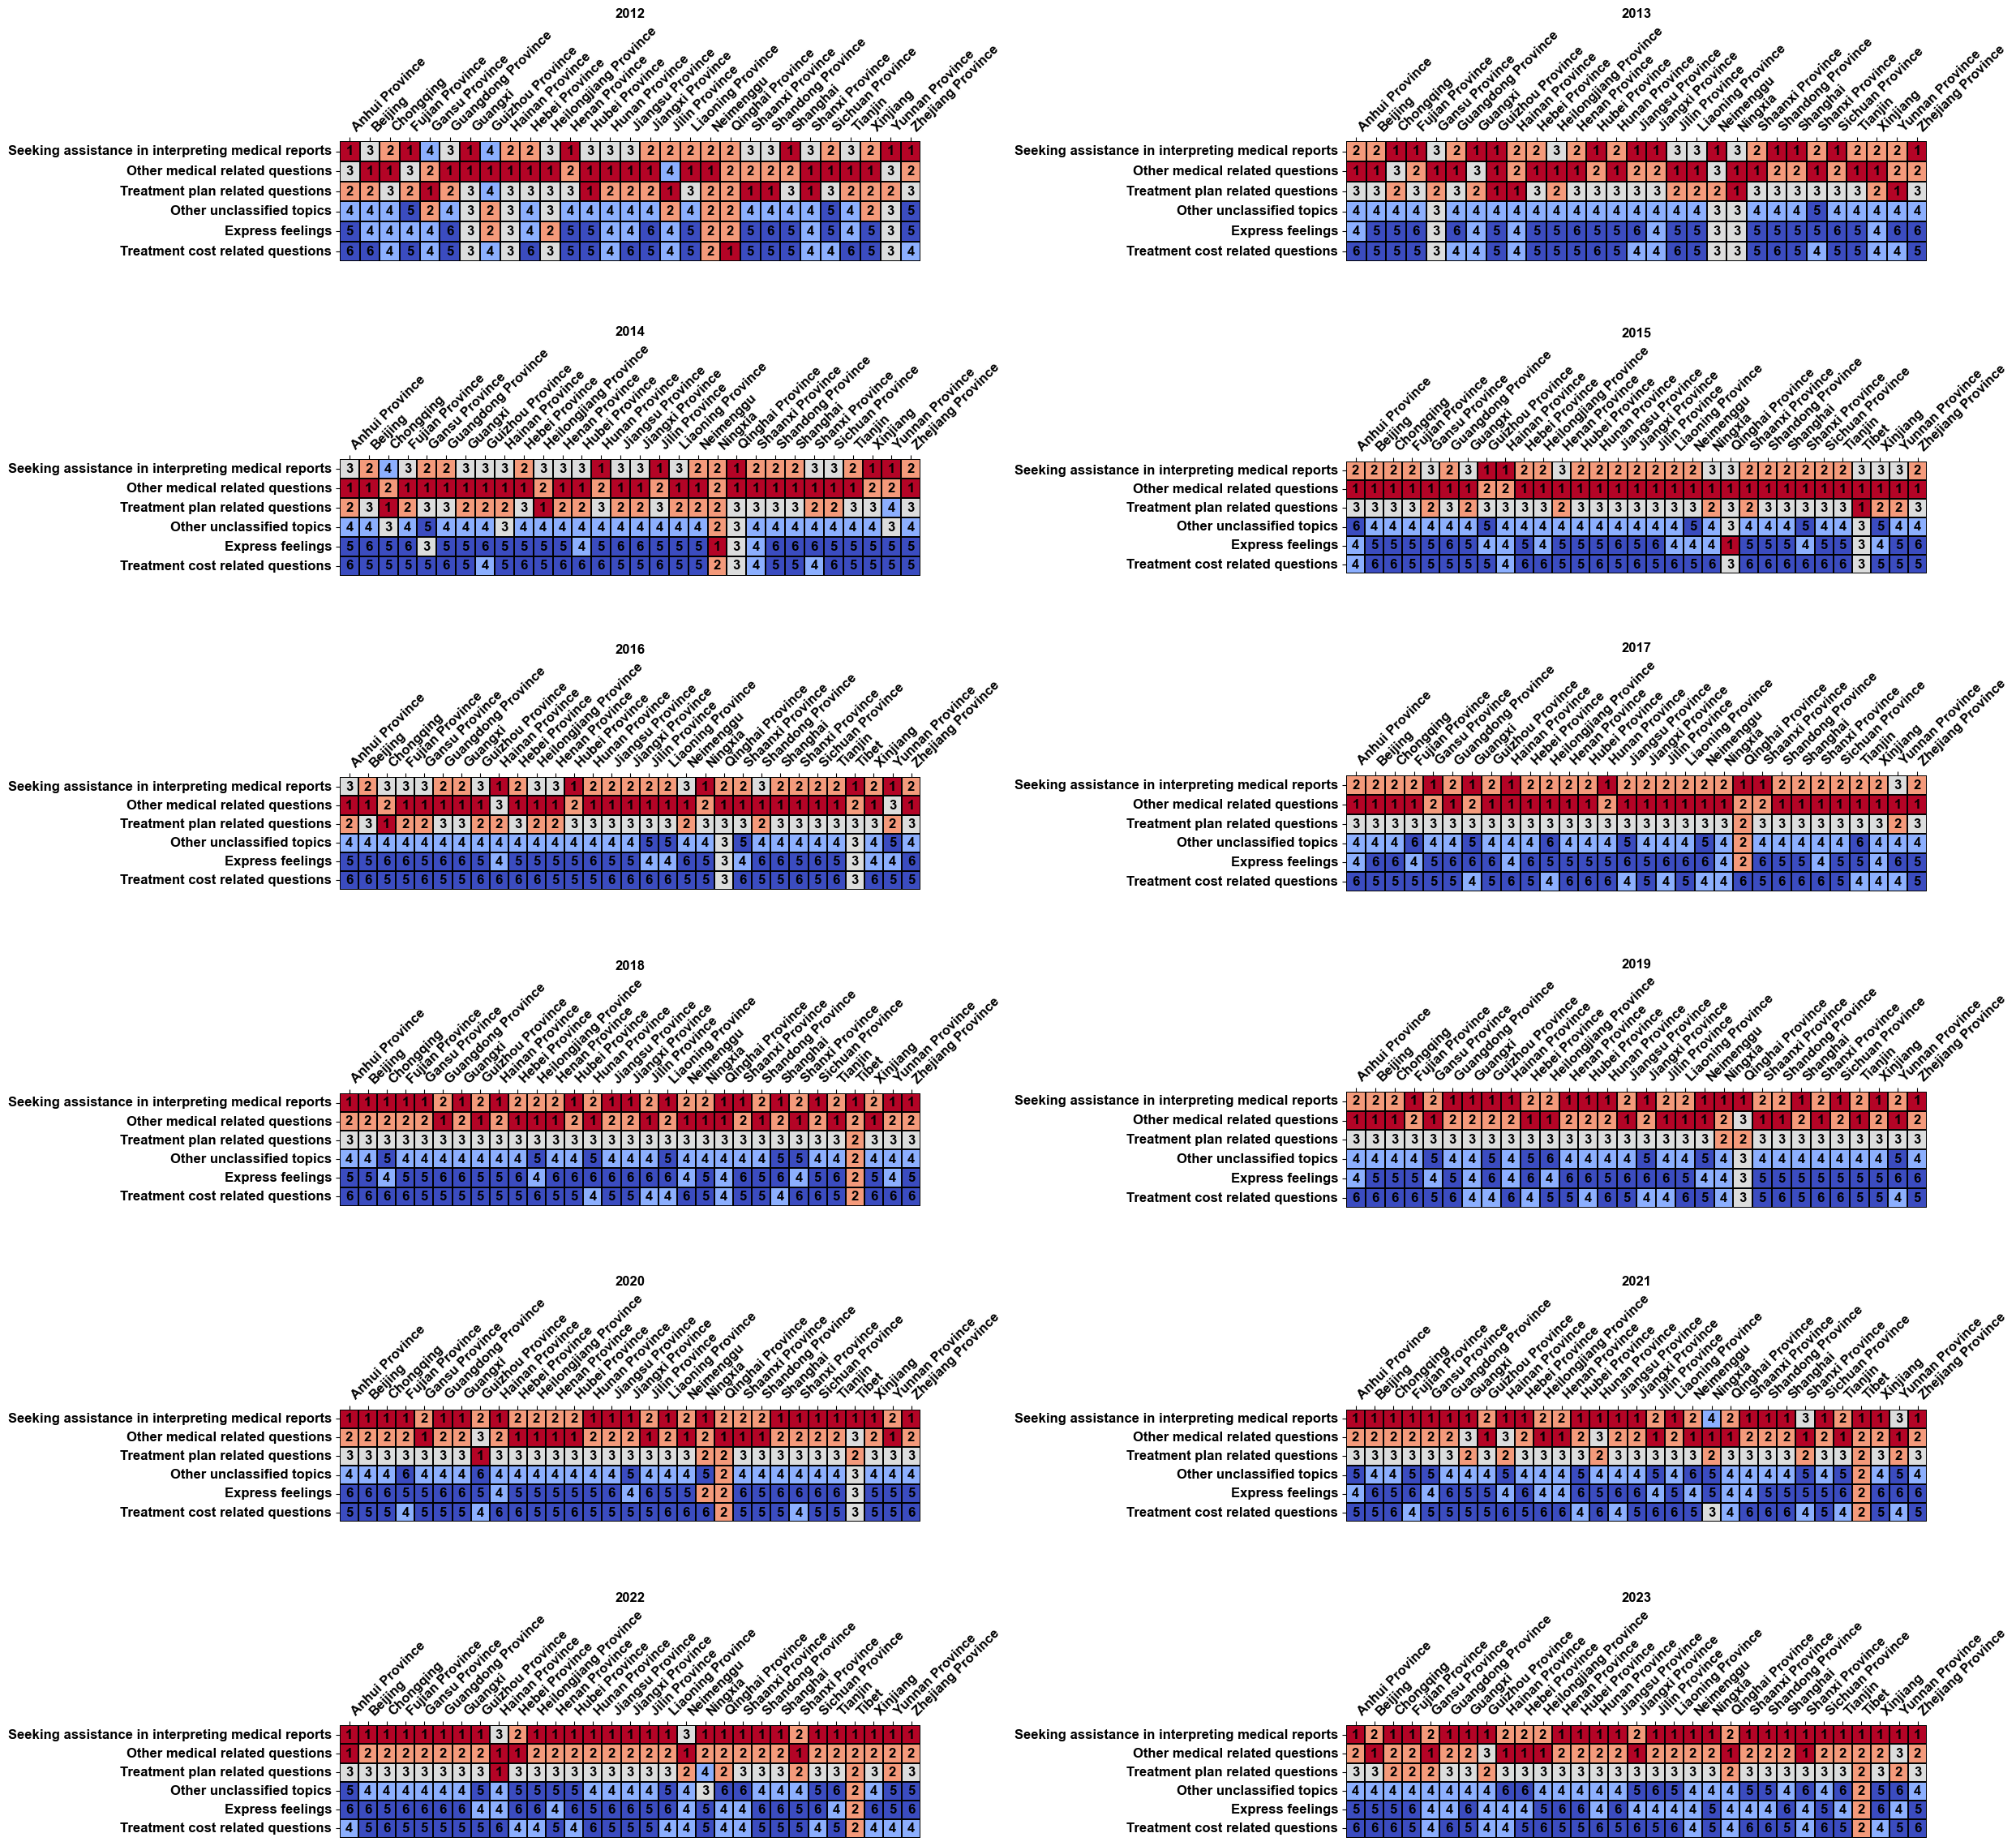

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 假设 byyear 数据已经加载
def _plot(ax, year: int):
    """绘制单个年份的热图到指定的子图轴上"""
    year = str(year)
    this_year = byyear.loc[year]
    this_year = this_year.reset_index()
    this_year = this_year.pivot(index='IP Address', columns='label', values='count')
    this_year = this_year.fillna(0)

    # 调整列的顺序和名称
    this_year = this_year.reindex(columns=['解读检查结果','其他治疗相关问题','对治疗相关问题提问','患者情绪支持','其他','经济负担'])
    this_year.columns = ['Seeking assistance in interpreting medical reports','Other medical related questions','Treatment plan related questions','Other unclassified topics','Express feelings','Treatment cost related questions']

    this_year_rank = this_year.rank(method='min', ascending=False, axis=1).astype(int)

    sns.set(context='notebook', style='ticks')
    sns.heatmap(
        this_year_rank.T,
        square=True,
        annot=True,
        cmap='coolwarm_r',
        cbar=False,
        vmin=1,
        vmax=5,
        center=3,
        linewidths=0.1,
        linecolor='black',
        annot_kws={"color": "black", "weight": "bold"},
        ax=ax,
    )

    # 设置轴属性
    ax.xaxis.set_label_position('top')  # 设置x轴标签位置为顶部
    ax.xaxis.tick_top()  # 将x轴的刻度移动到顶部
    ax.set_xticklabels(ax.get_xticklabels(), weight='bold', rotation=45, ha='left', fontdict={'fontsize': 12})
    ax.set_yticklabels(ax.get_yticklabels(), weight='bold', fontdict={'fontsize': 12})
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(f"{year}", fontsize=12, weight='bold')  # 添加年份标题

# 绘制 2012-2023 年所有子图
years = range(2012, 2024)
n_cols = 2  # 每行子图数
n_rows = -(-len(years) // n_cols)  # 计算行数（向上取整）

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 4))

# 平铺年份子图
axes = axes.flatten()  # 转为1D数组，方便索引
for i, year in enumerate(years):
    _plot(axes[i], year)

# 隐藏多余的子图
for j in range(len(years), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

2012


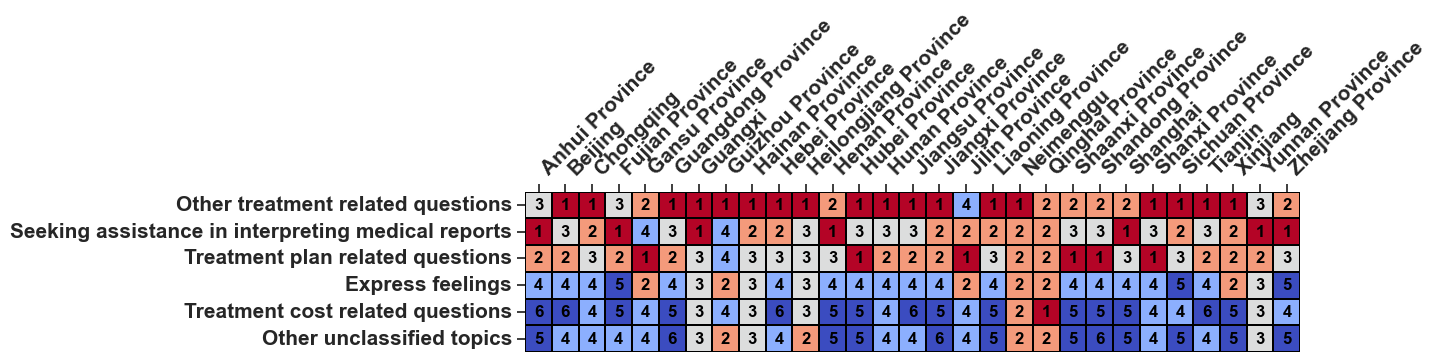

2013


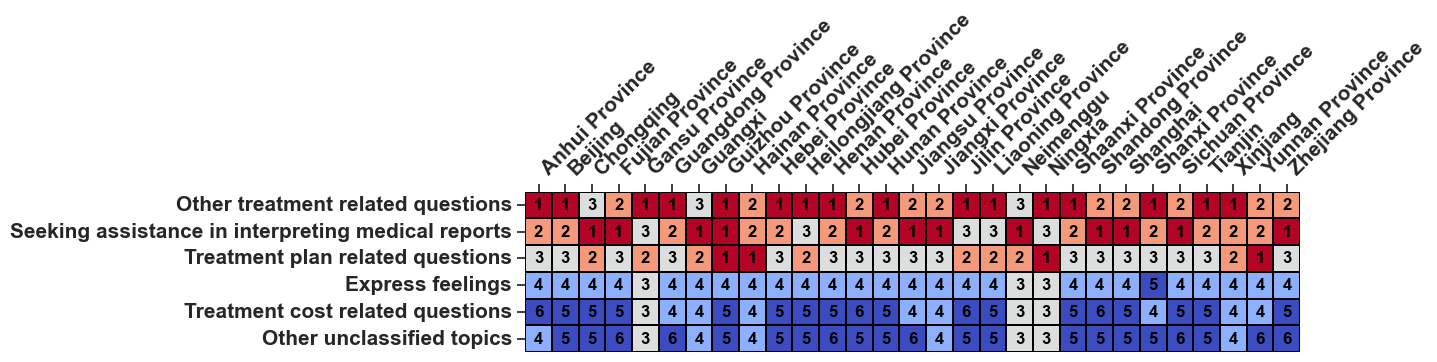

2014


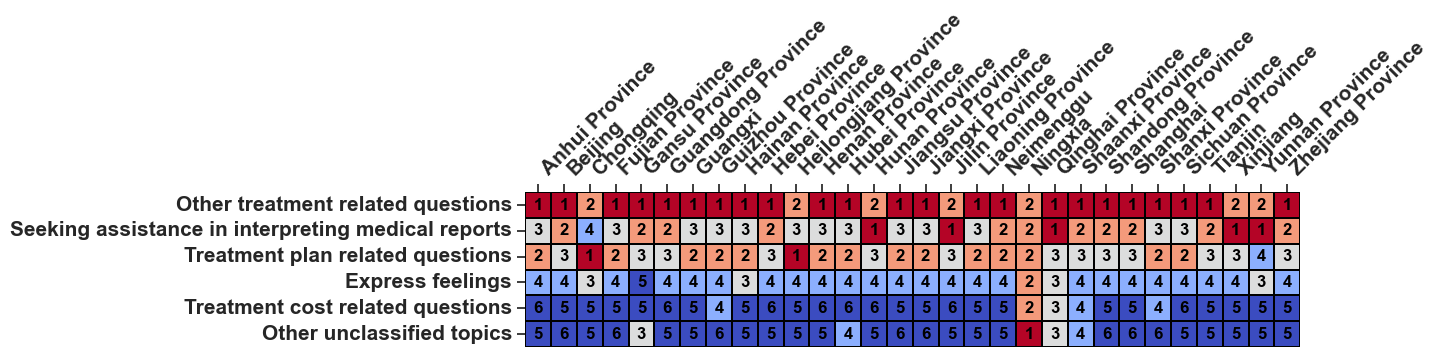

2015


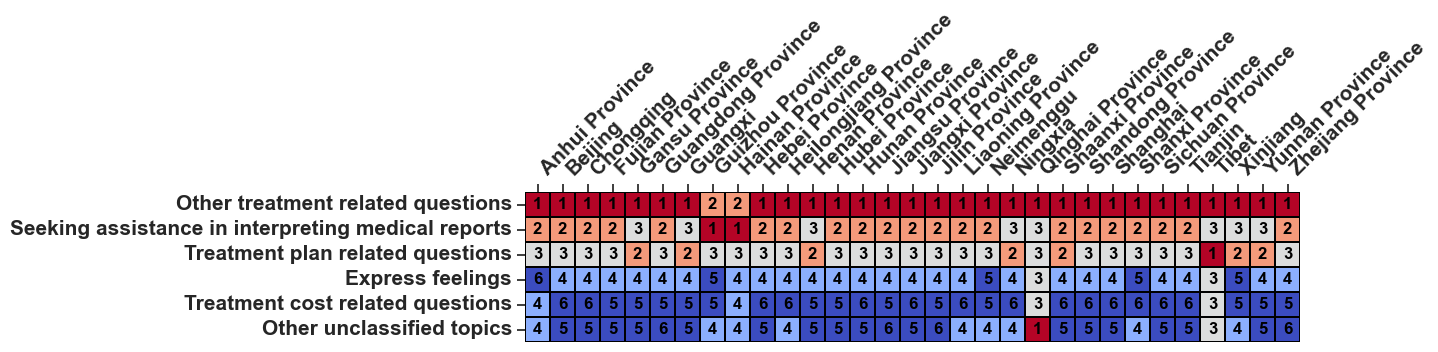

2016


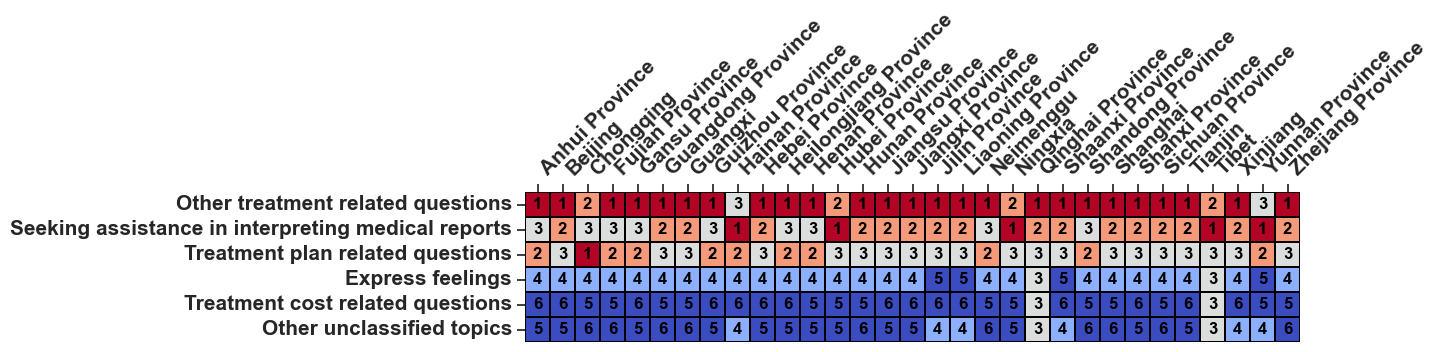

2017


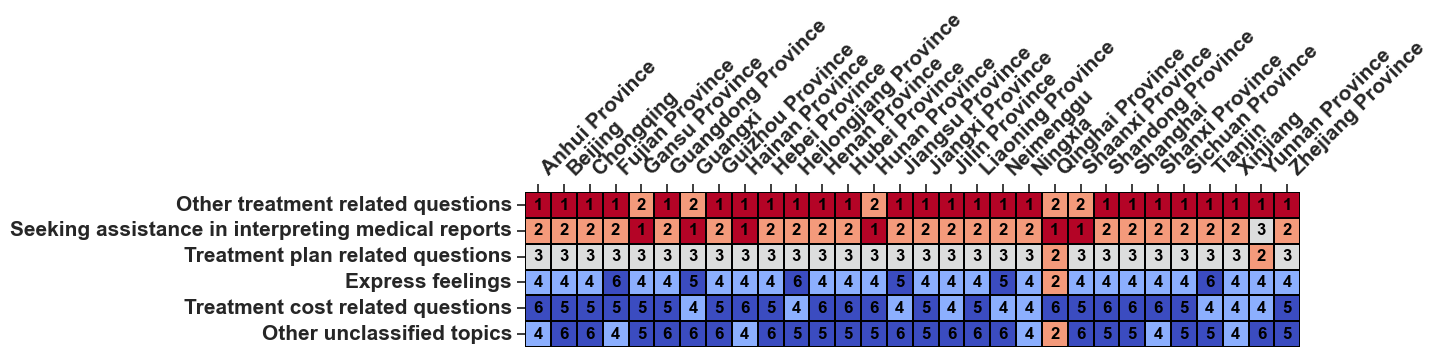

2018


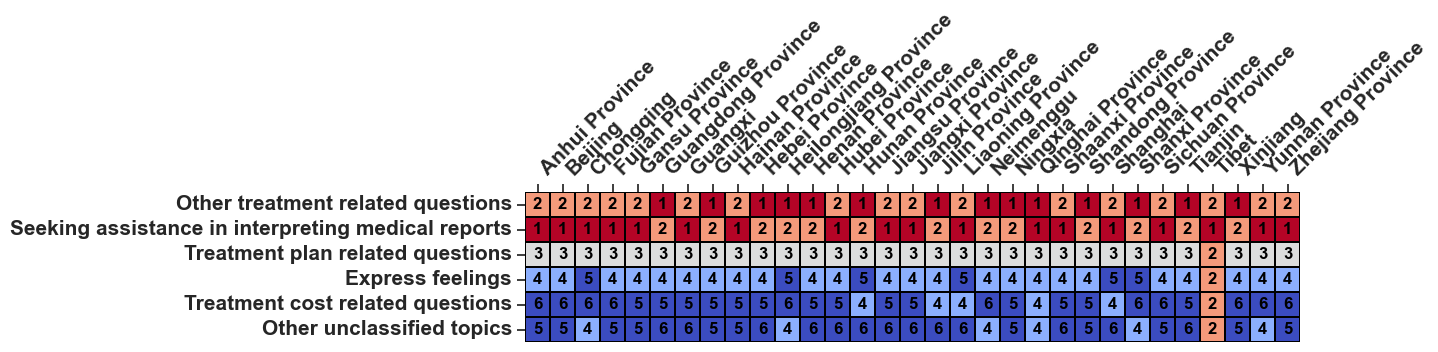

2019


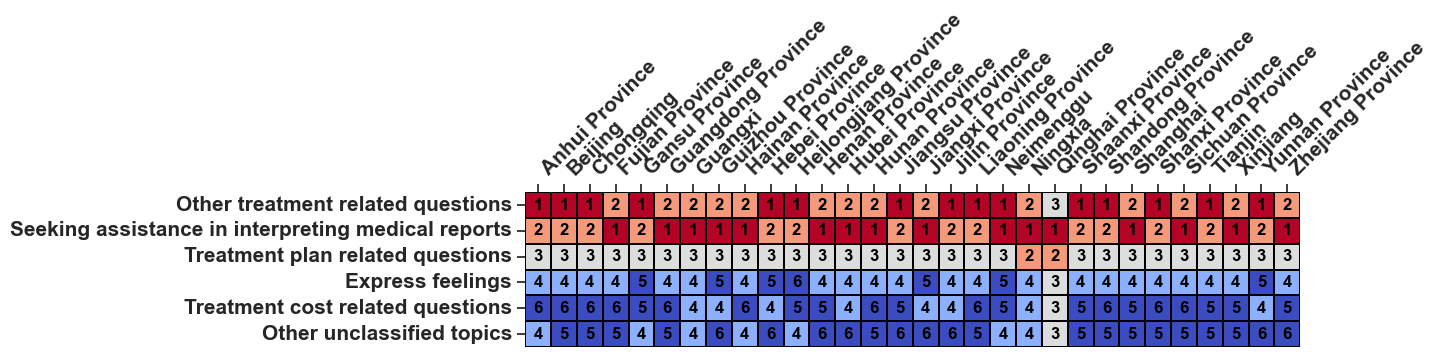

2020


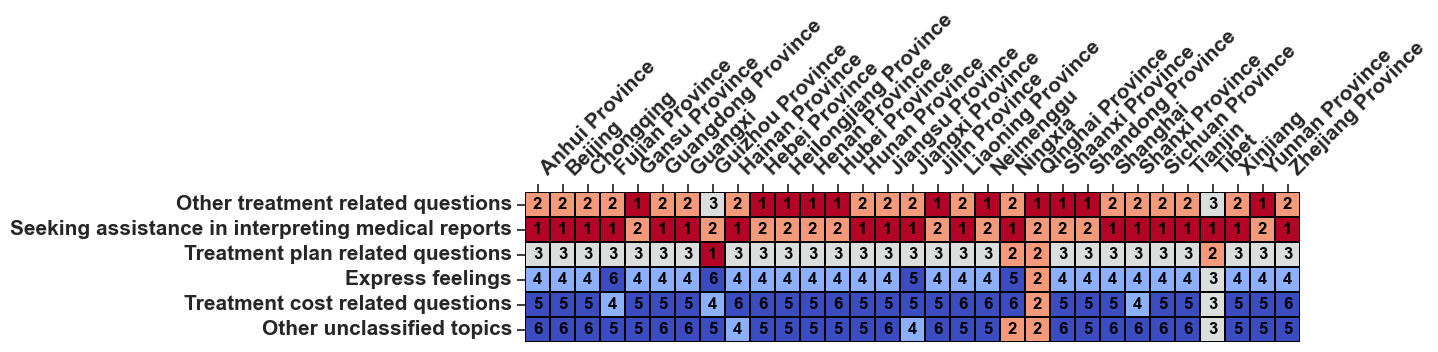

2021


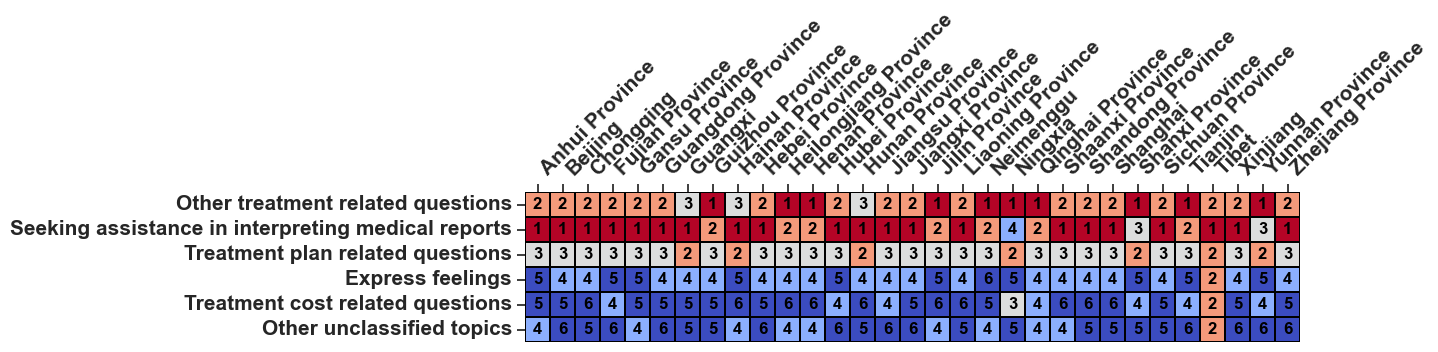

2022


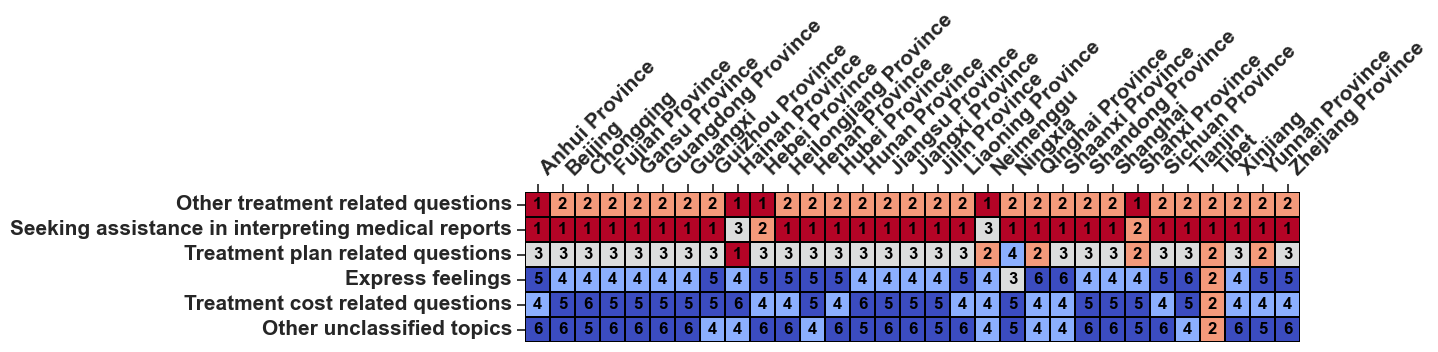

2023


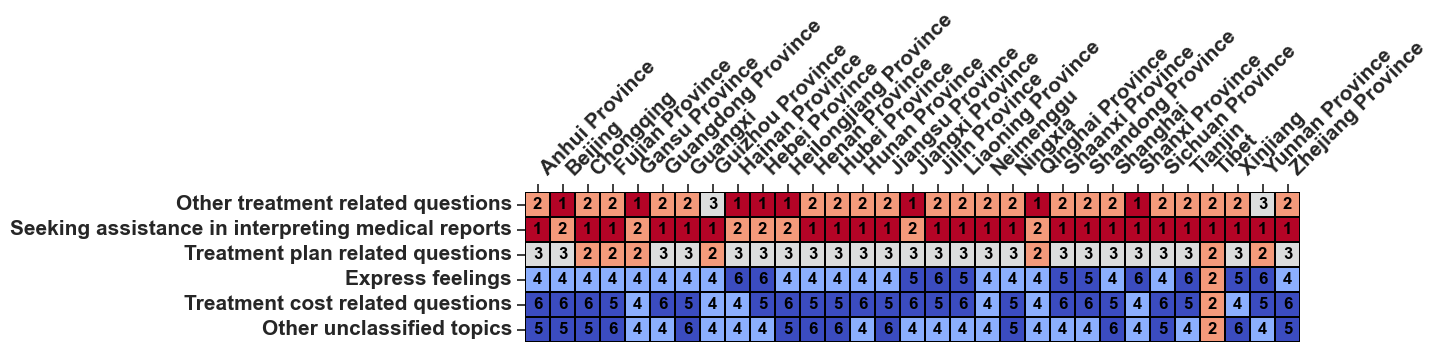

In [23]:
for i in range(2012,2024):
    print(i)
    _plot(i)